# Problem Statement

## Mobile Price Prediction Project

### Task 1: Data Analysis Report
### Task 2: Price Range Prediction
### Task 3: Business Analysis and Feature Importance

## Importing all the neccessary libraries

In [25]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
import zipfile

# checking what the files inside zip file
with zipfile.ZipFile("Cellphone.zip", "r") as z:
    print(z.namelist())

['Data/datasets_11167_15520_train.csv']


### Load the dataset

In [6]:
# Extract the zip
zipfile.ZipFile("Cellphone.zip").extractall()

# Load the CSV from the Data folder
df = pd.read_csv("Data/datasets_11167_15520_train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Basic Checks

In [11]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [14]:
df.ndim

2

In [15]:
df.shape

(2000, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [21]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [22]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


## Exploratory Data Analysis

### Distribution of Target variables

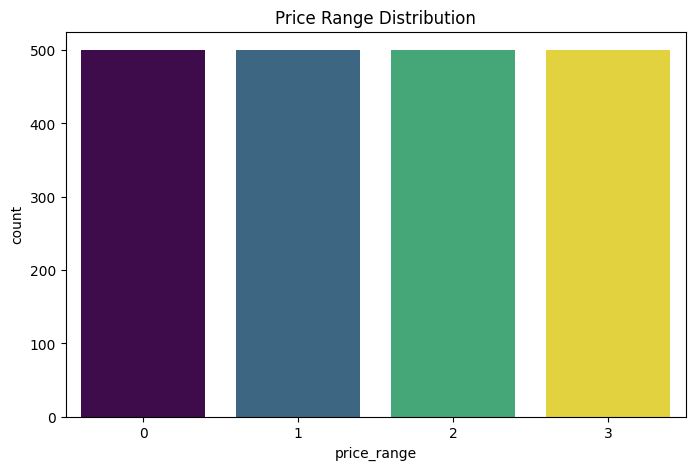

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='price_range', hue='price_range', legend=False, palette='viridis')
plt.title("Price Range Distribution")
plt.show()

### Histogram for all numerical features

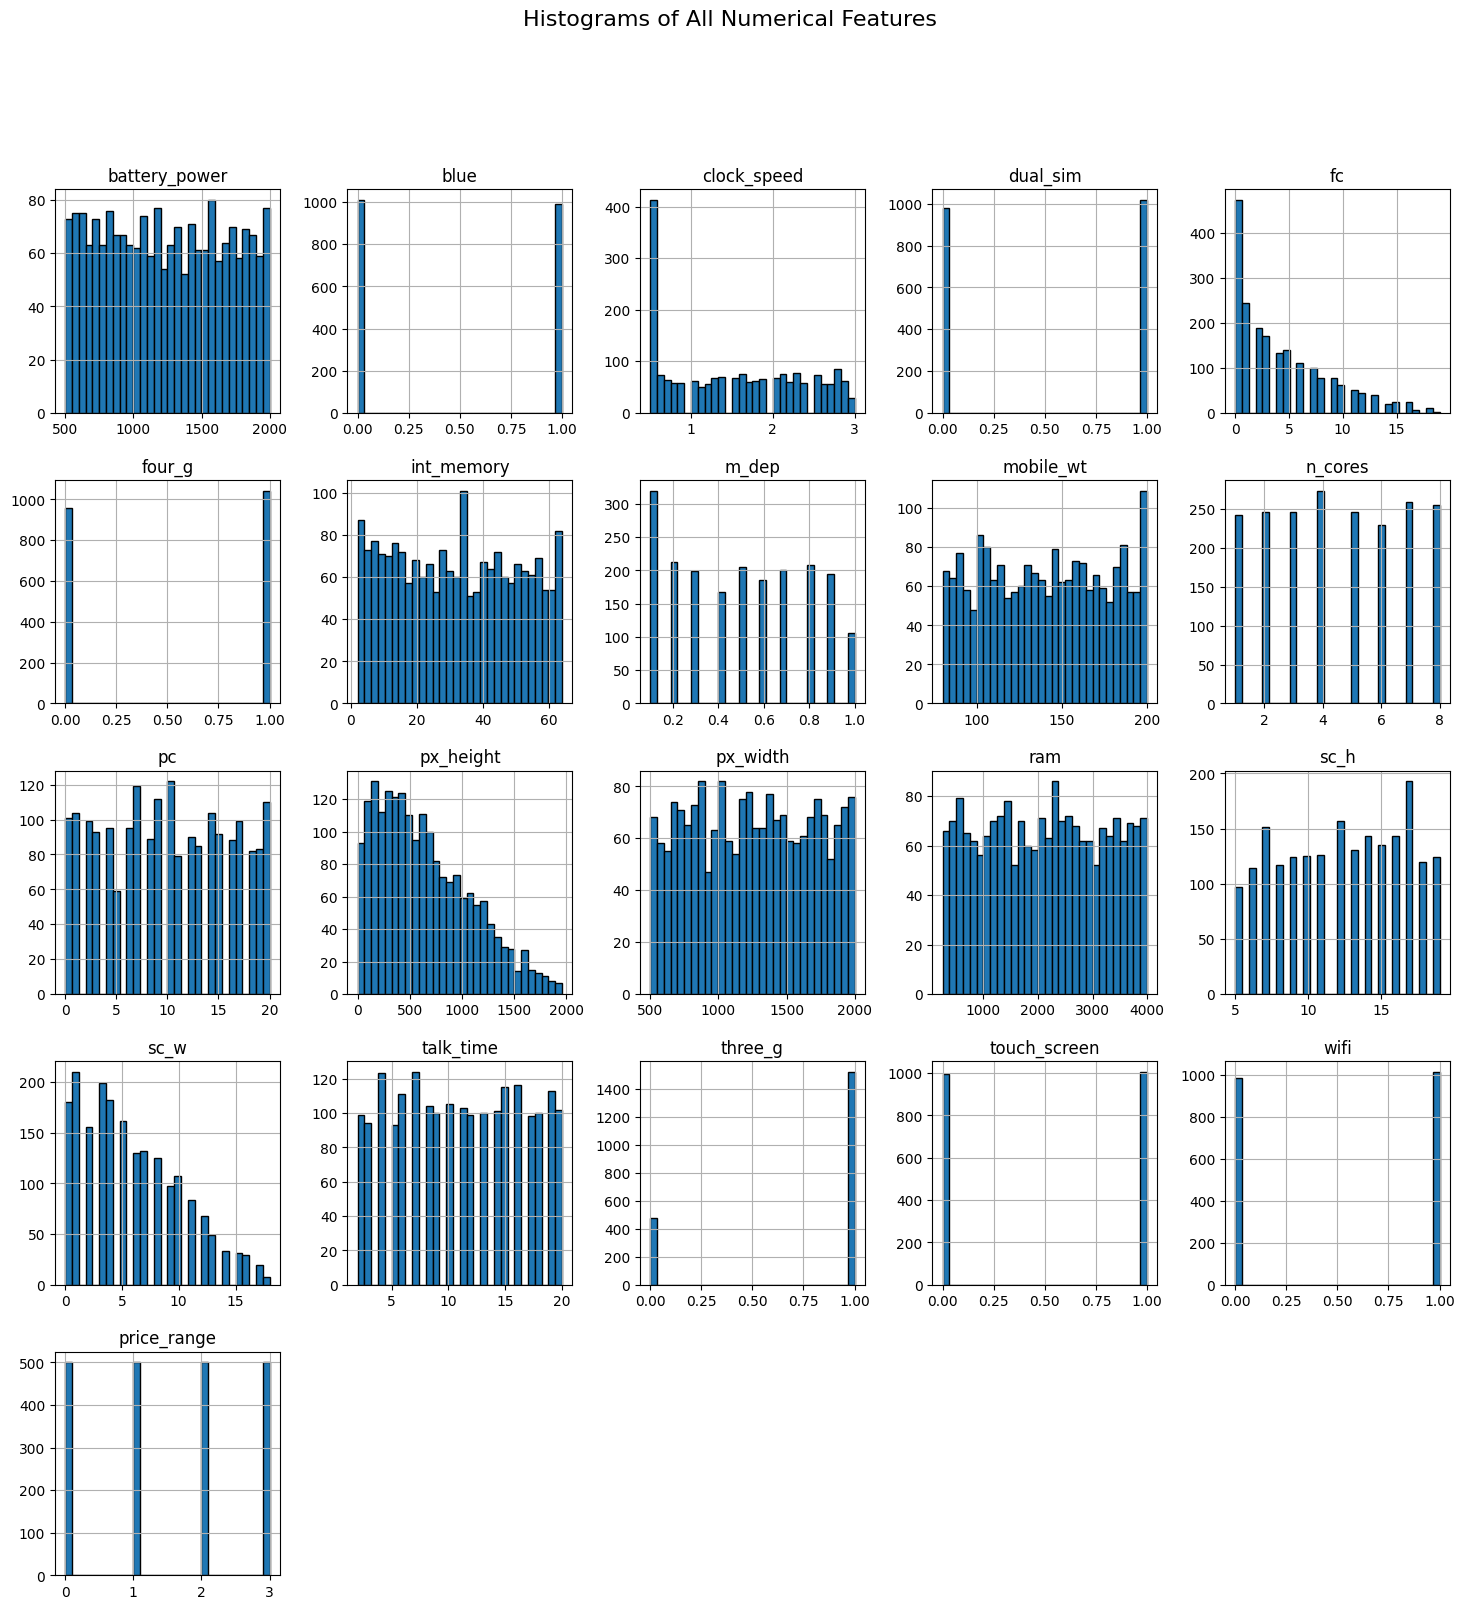

In [24]:
df.hist(figsize=(18, 18), bins=30, edgecolor='black')
plt.suptitle("Histograms of All Numerical Features", fontsize=16)
plt.show()

### Boxplot for outlier detection

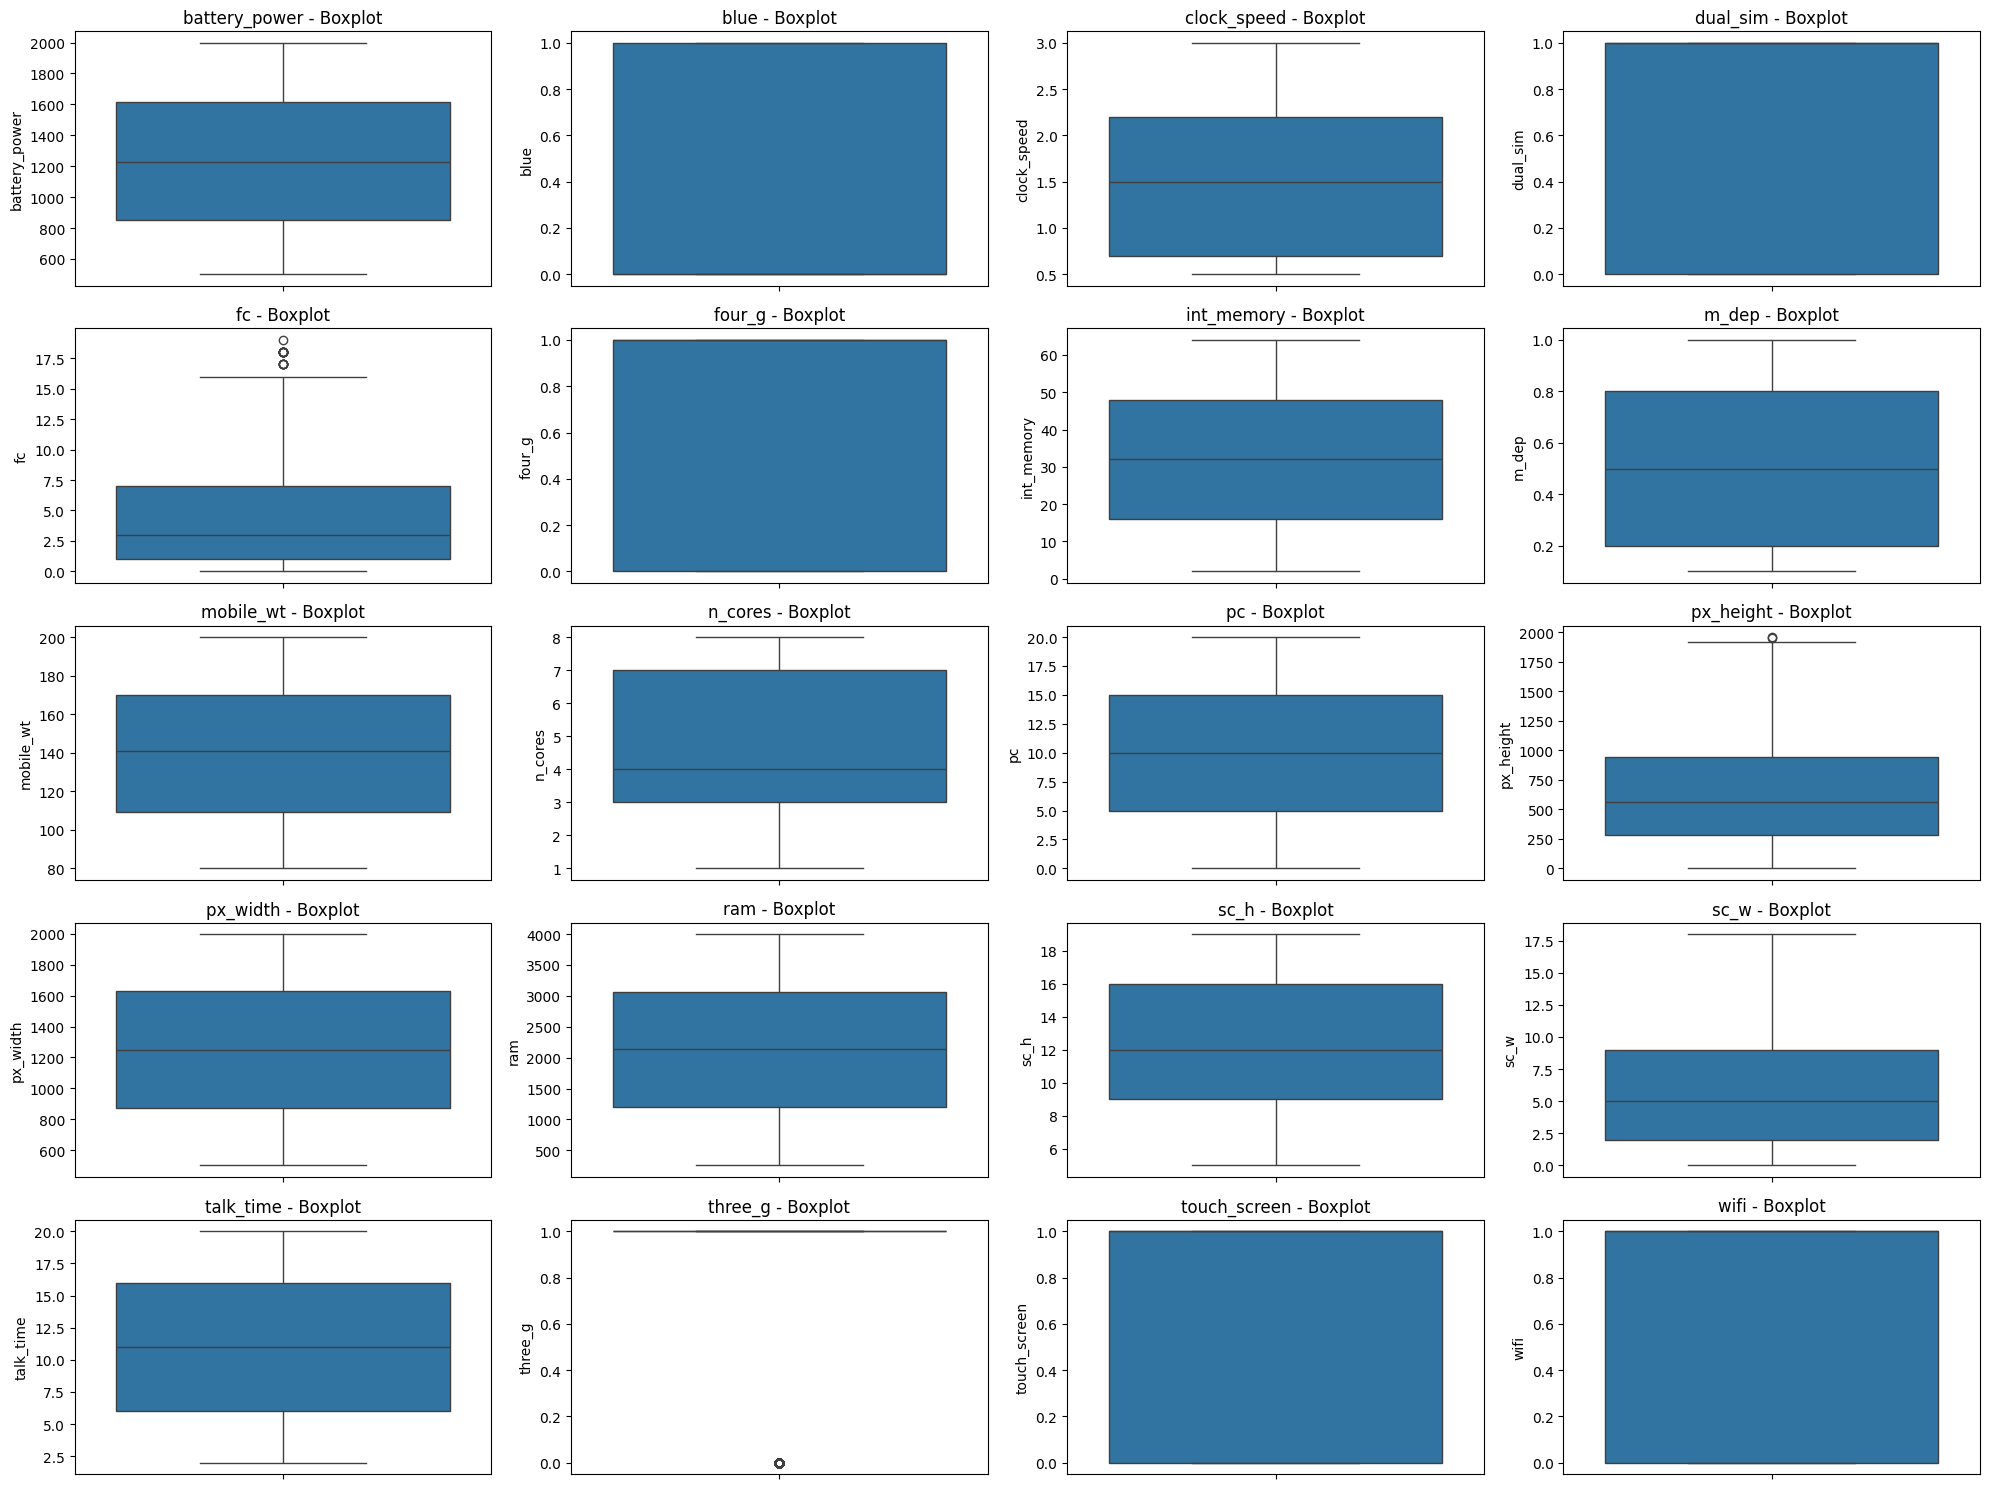

In [25]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(df.columns[:-1], 1):   # skipping target column
    plt.subplot(5, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"{col} - Boxplot")

plt.tight_layout()
plt.show()

### Correlation heatmap for all features

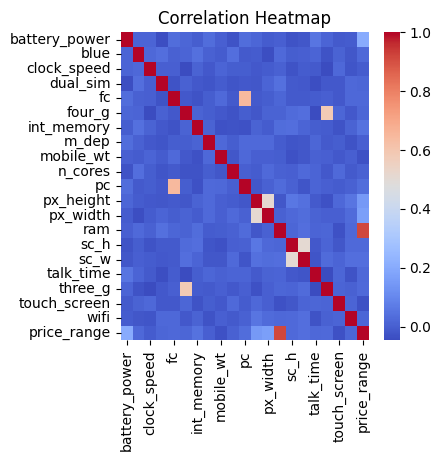

In [26]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Top 10 Highly Correlated Features with Price Range

In [27]:
corr = df.corr()["price_range"].sort_values(ascending=False)
corr

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

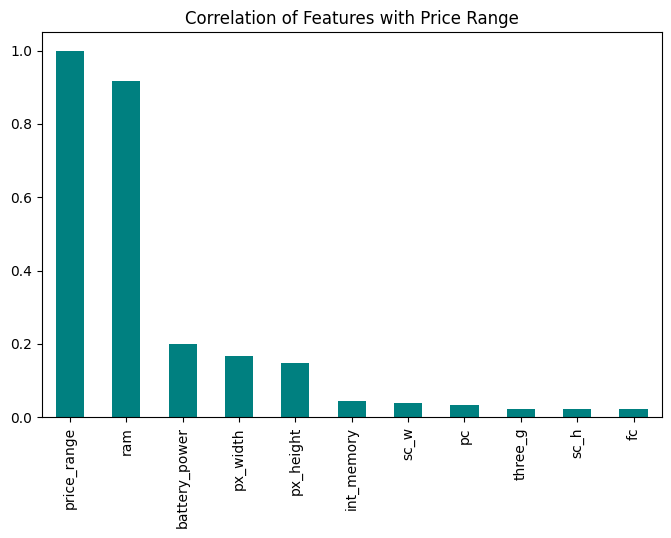

In [28]:
# ploting the important ones
plt.figure(figsize=(8,5))
corr[:11].plot(kind='bar', color='teal')
plt.title("Correlation of Features with Price Range")
plt.show()

### Pairplot for important featurea

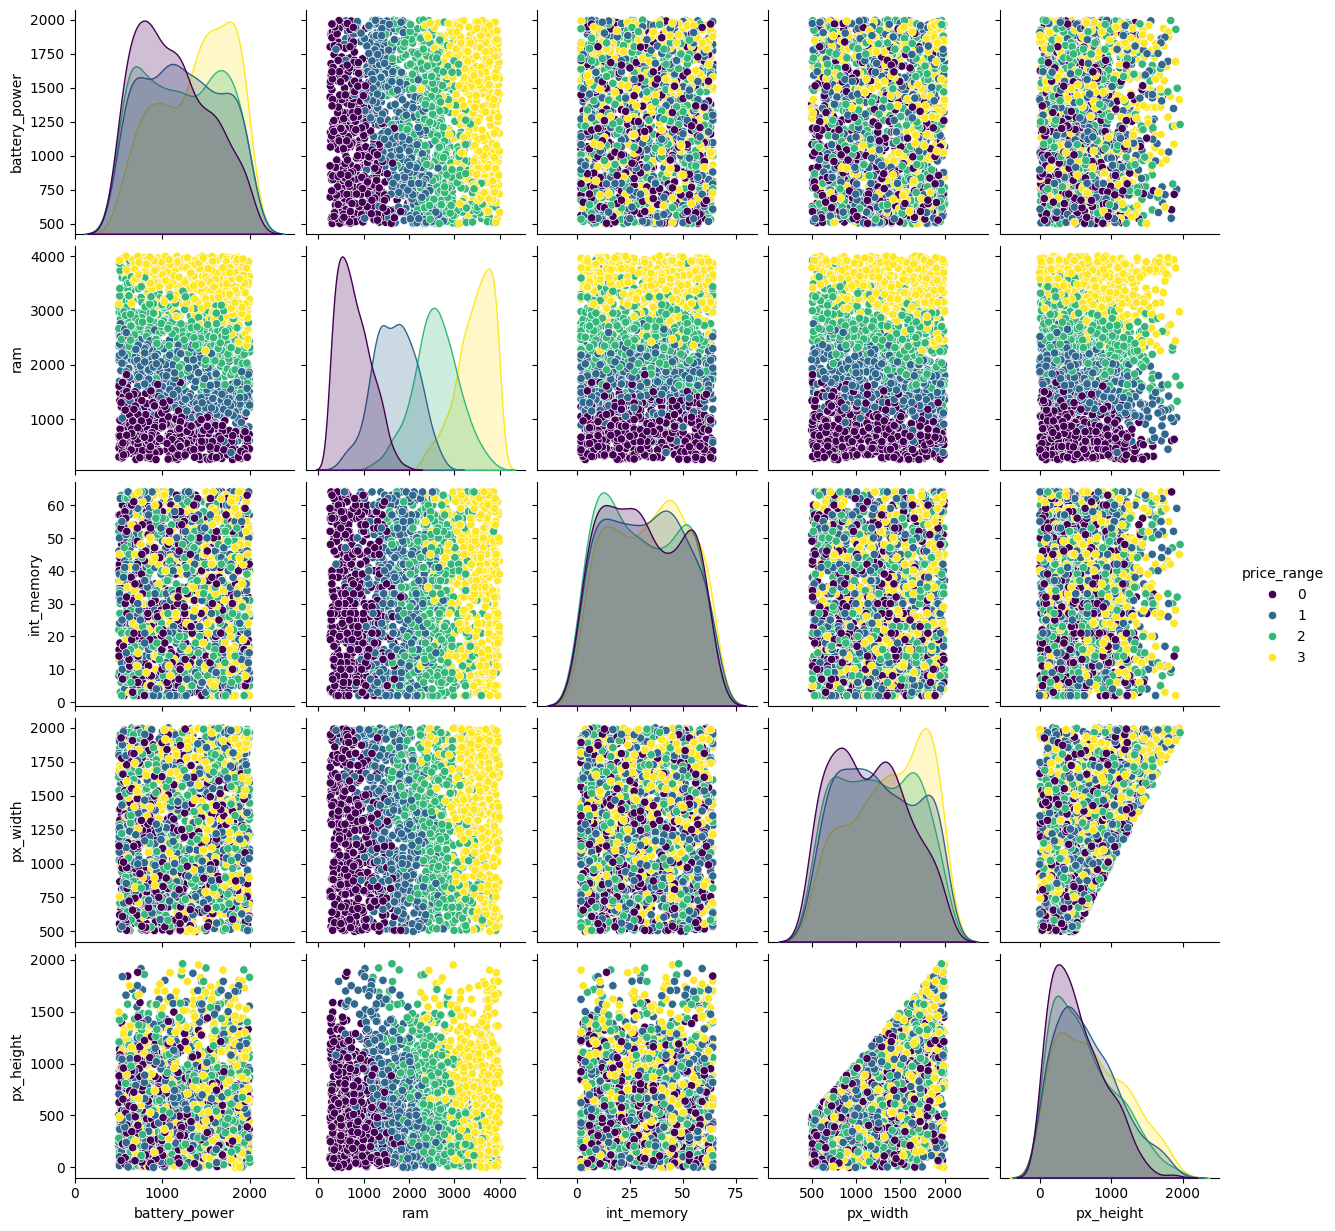

In [29]:
important_cols = ['battery_power','ram','int_memory','px_width','px_height','price_range']
sns.pairplot(df[important_cols], hue='price_range', palette="viridis")
plt.show()

### Countplots for categorical features

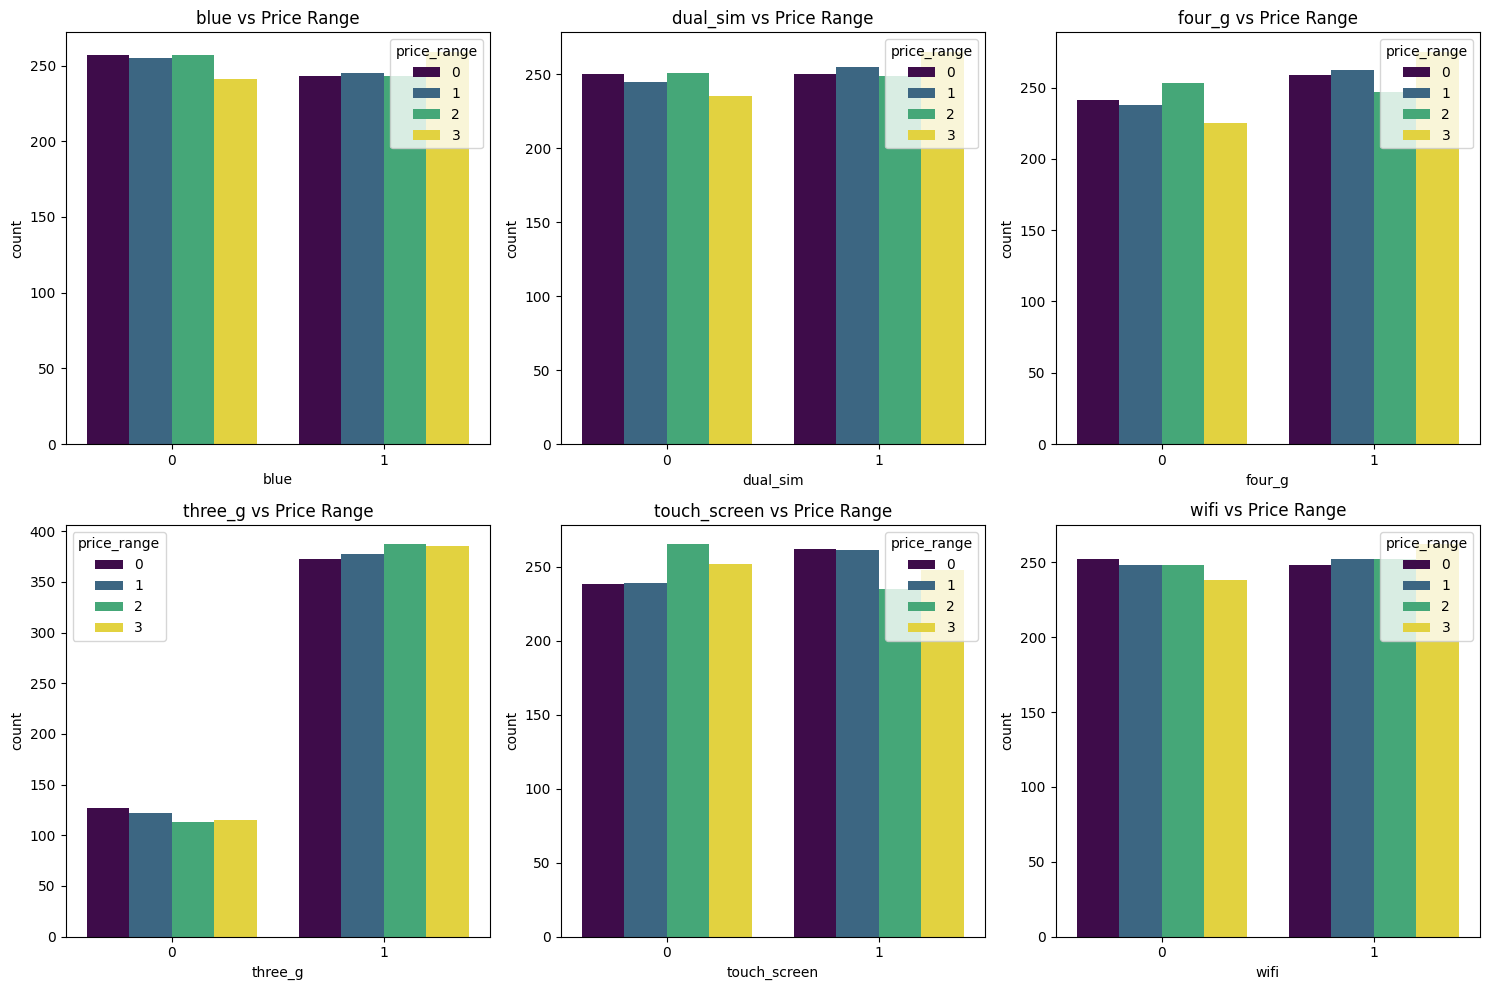

In [30]:
binary_cols = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

plt.figure(figsize=(15,10))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='price_range', palette="viridis")
    plt.title(f"{col} vs Price Range")

plt.tight_layout()
plt.show()

### Scatterplots for Key Relationships

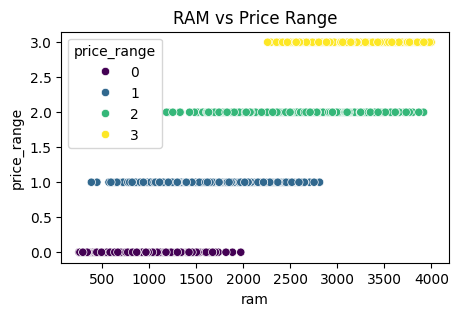

In [31]:
# RAM vs Price
plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x='ram', y='price_range', hue='price_range', palette='viridis')
plt.title("RAM vs Price Range")
plt.show()

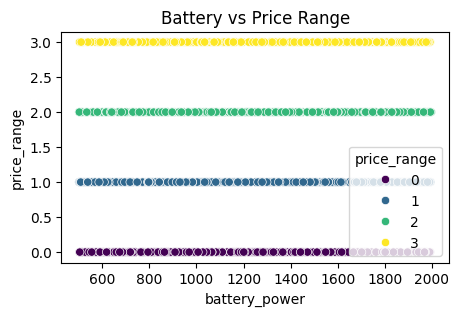

In [32]:
# Battery vs Price
plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x='battery_power', y='price_range', hue='price_range', palette='viridis')
plt.title("Battery vs Price Range")
plt.show()

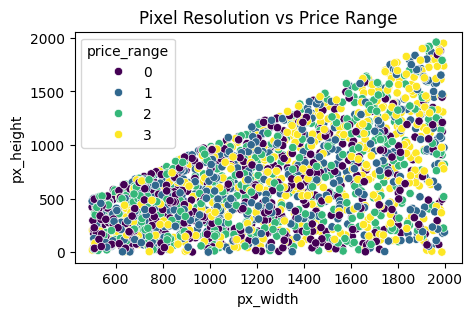

In [33]:
# screen Resolution vs Price
plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x='px_width', y='px_height', hue='price_range', palette='viridis')
plt.title("Pixel Resolution vs Price Range")
plt.show()

### Screen Dimensions Distribution

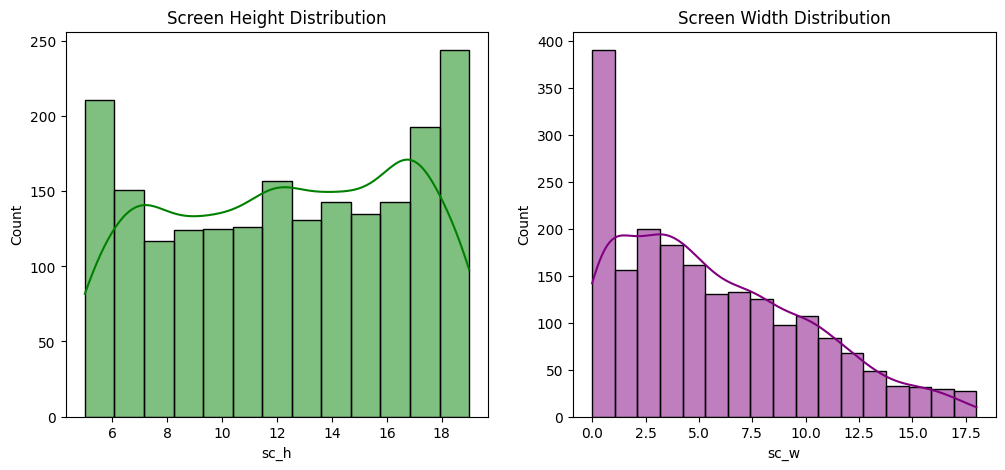

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['sc_h'], kde=True, color='green')
plt.title("Screen Height Distribution")

plt.subplot(1,2,2)
sns.histplot(df['sc_w'], kde=True, color='purple')
plt.title("Screen Width Distribution")

plt.show()

#### Overall Structure

#### Key Strengths of dataset

## Data Preprocessing

In [7]:
# Split Features and target
X = df.drop("price_range", axis=1)
y = df["price_range"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
# Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Final shape check
print(X_train_scaled.shape, X_test_scaled.shape)

(1600, 20) (400, 20)


## Model Building, Training and Evaluation

### SVM Model

In [11]:
svm = SVC(kernel="rbf", C=10, gamma='scale')
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       100
           1       0.85      0.81      0.83       100
           2       0.83      0.87      0.85       100
           3       0.95      0.94      0.94       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



#### Tuning for SVM Model

In [12]:
# Define SVM model
svm = SVC(kernel='rbf', probability=False, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 50],        # Regularization
    'gamma': ['scale', 0.01, 0.05, 0.1, 0.5]  # Kernel coefficient
}
# GridSearchCV
grid = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train_scaled, y_train)
# Best SVM model
best_svm = grid.best_estimator_
# Predict
y_pred_svm = best_svm.predict(X_test_scaled)

# Accuracy
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Best SVM Parameters:", grid.best_params_)
print(classification_report(y_test, y_pred_svm))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuned SVM Accuracy: 0.94
Best SVM Parameters: {'C': 10, 'gamma': 0.01}
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       100
           1       0.93      0.90      0.91       100
           2       0.93      0.93      0.93       100
           3       0.95      0.98      0.97       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



### Logistic Regression

In [13]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
y_pred_lr = LR.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



#### Tuning for Logistic Regression 

In [14]:
# Define the model
LR = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=500)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 50],
    'penalty': ['l2'],  # multinomial supports only l2 for most solvers
    'solver': ['lbfgs', 'saga']
}
# GridSearchCV
grid = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Predictions with best model
best_LR = grid.best_estimator_
y_pred_lr = best_LR.predict(X_test_scaled)

# Evaluate
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Best parameters: {'C': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.9775
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.98      0.96      0.97       100
           2       0.95      0.98      0.97       100
           3       0.99      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### KNN Model

In [16]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # start with 5 neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67       100
           1       0.33      0.38      0.35       100
           2       0.39      0.41      0.40       100
           3       0.72      0.51      0.60       100

    accuracy                           0.50       400
   macro avg       0.52      0.50      0.51       400
weighted avg       0.52      0.50      0.51       400


Confusion Matrix:
 [[70 26  4  0]
 [33 38 24  5]
 [ 5 39 41 15]
 [ 0 13 36 51]]


#### Tuning for KNN Model

In [17]:
# Define the model
knn = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
# GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Predictions with best model
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Tuned KNN Accuracy: 0.6175

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       100
           1       0.50      0.51      0.50       100
           2       0.51      0.53      0.52       100
           3       0.76      0.68      0.72       100

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400



### XGBoost Classifier

In [22]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Accuracy
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.925
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.92      0.91      0.91       100
           2       0.87      0.88      0.88       100
           3       0.95      0.92      0.93       100

    accuracy                           0.93       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400



#### Tuning for XGBoost

In [24]:
# Define the model
xgb = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', use_label_encoder=False)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
# Set up GridSearchCV
grid = GridSearchCV(estimator=xgb, param_grid=param_grid,
                    cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid.fit(X_train_scaled, y_train)

# Get the best model
best_xgb = grid.best_estimator_
print("Best Hyperparameters:", grid.best_params_)

# Predict and evaluate
y_pred_xgb = best_xgb.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
XGBoost Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.92      0.89      0.90       100
           2       0.88      0.90      0.89       100
           3       0.96      0.95      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



#### Decision Tree Model

In [26]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.78      0.74      0.76       100
           2       0.75      0.80      0.77       100
           3       0.92      0.86      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



#### Tuning for Decision Tree

In [27]:
# Define the model
dt = DecisionTreeClassifier(random_state=42)
# Hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# GridSearchCV
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Predictions with best model
best_dt = grid.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

# Evaluate
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.8675

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       100
           1       0.82      0.78      0.80       100
           2       0.80      0.80      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



### Confusion matrix for the models

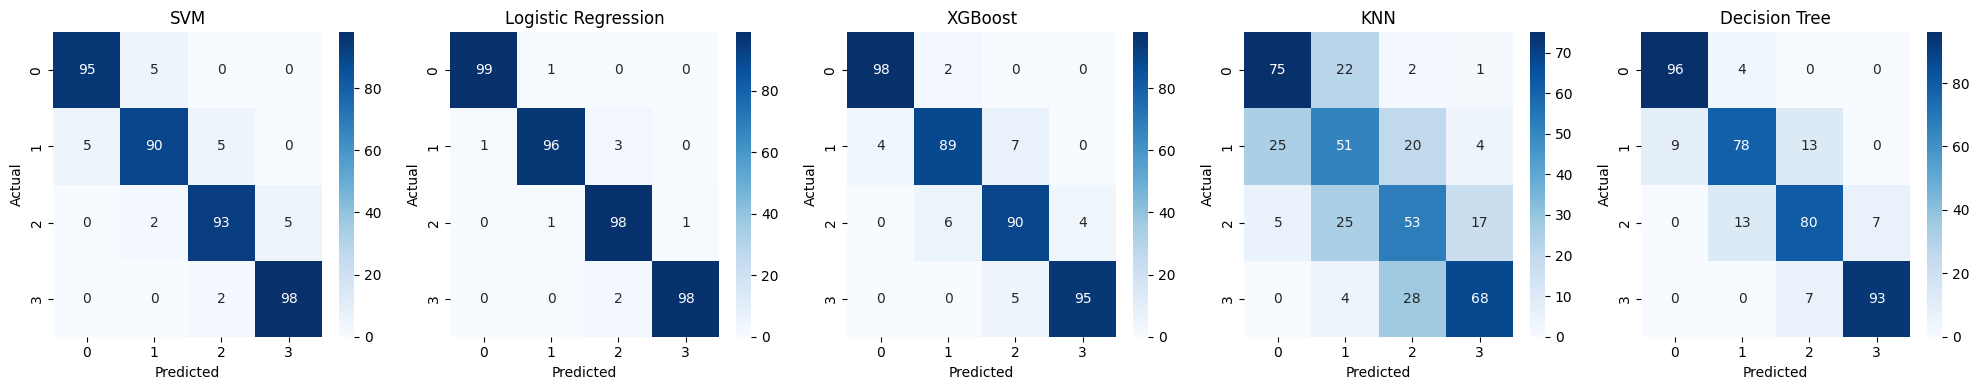

In [31]:
# Dictionary of models and their predictions
els = {
    'SVM': y_pred_svm,  
    'Logistic Regression': y_pred_lr,  
    'XGBoost': y_pred_xgb,
    'KNN': y_pred_knn,
    'Decision Tree': y_pred_dt
}
# Set up subplot grid
fig, axes = plt.subplots(1, len(els), figsize=(20, 4))  # 1 row, 5 columns

for ax, (model_name, y_pred) in zip(axes, els.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Comparing the Models with Line Plot

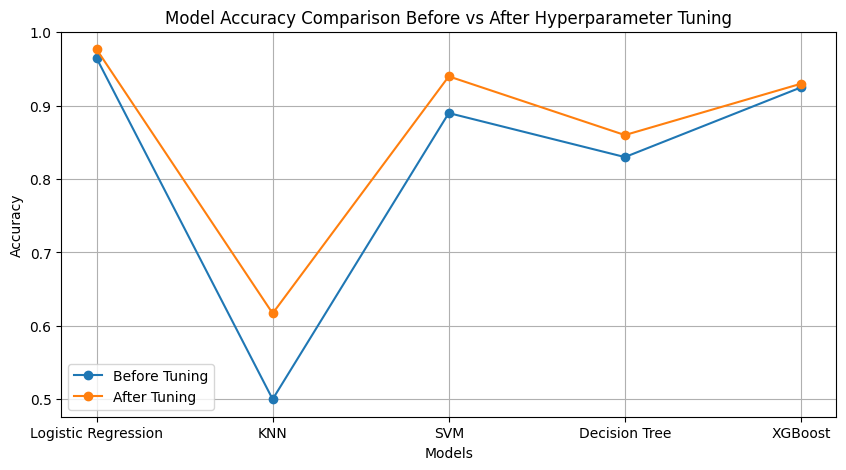

In [32]:
# Model accuracies before and after tuning
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'XGBoost']
before = [0.965, 0.50, 0.89, 0.83, 0.925]
after  = [0.977, 0.617, 0.94, 0.86, 0.93]

plt.figure(figsize=(10,5))
plt.plot(models, before, marker='o', label='Before Tuning')
plt.plot(models, after, marker='o', label='After Tuning')

plt.title("Model Accuracy Comparison Before vs After Hyperparameter Tuning")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Saving the models

In [24]:
# Save Logistic Regression
joblib.dump(LR, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [25]:
# Save SVM
joblib.dump(svm, "svm_model.pkl")

['svm_model.pkl']

In [26]:
# Save XGBoost
joblib.dump(xgb, "xgboost_model.pkl")

['xgboost_model.pkl']

In [34]:
# Save KNN model
joblib.dump(knn, "knn_model.pkl")

['knn_model.pkl']

In [35]:
# Save Decision Tree model
joblib.dump(dt, "decision_tree_model.pkl")

['decision_tree_model.pkl']

# ## CellPhone Price Prediction
#### Prepared by: PTID-CDS-NOV-25-3423, Date: December 8, 2025

---

## Objective
The objective of the Cellphone Price Prediction project is to build a machine learning model that accurately classifies mobile phones into four price ranges based on their specifications. By analyzing features such as RAM, battery power, camera quality, and connectivity options, the model helps identify how hardware components influence pricing. This prediction system can assist manufacturers, retailers, and consumers in understanding product segmentation. Ultimately, the goal is to develop an efficient and reliable model that supports decision-making in the mobile market.

---

## Introduction
The Cellphone Price Prediction project aims to analyze mobile phone specifications to determine their corresponding price range. With the rapid growth of smartphone technology, understanding how features such as RAM, battery capacity, camera performance, and display quality affect pricing has become essential. By applying machine learning techniques, this project builds models that can classify phones into predefined price categories. Such predictions can help consumers make informed choices and assist companies in designing competitive products based on market trends.

---

## Data Understanding
The dataset used for cellphone price prediction contains 2,000 mobile phone records with 21 features, including both numerical and categorical variables. These features describe key specifications such as battery power, RAM, pixel resolution, memory, camera strength, and network capabilities. The target variable, **price_range**, is evenly distributed into four classes: low, medium, high, and very high. No missing values are present, and all columns are numeric, making the data suitable for machine learning models. Overall, the dataset provides a comprehensive view of hardware characteristics that influence smartphone pricing.

---

## Basic Checks
To understand the dataset structure, several basic exploratory checks were performed. First, the dataset’s **shape and dimensions** confirmed 2,000 rows and 21 columns. Using `head()` and `tail()`, the top and bottom records were inspected to verify data consistency. The `info()` summary showed that all features are numerical and there are no missing values. The `describe()` function provided statistical insights such as mean, median, and standard deviation for each feature. Checks for **null values** returned zero, and analysis of **unique values** ensured that all columns contain valid ranges. No duplicated rows were found in the dataset. The target variable (**price_range**) is perfectly balanced with 500 samples in each class. Finally, a **correlation matrix** revealed that RAM and battery power have the strongest influence on price, helping identify the most important features for model building.

---

## Exploratory Data Analysis
The EDA began by examining the **distribution of the target variable**, which was found to be perfectly balanced across the four price ranges. Histograms of all numerical features were plotted to understand their spread, followed by **boxplots** to detect potential outliers in variables like battery power, RAM, and pixel dimensions. A **correlation heatmap** highlighted strong positive relationships, especially RAM and battery power with price range, and the **top 10 highly correlated features** were extracted for feature importance insights. Pairplots were created for key attributes such as RAM, battery power, and pixel resolution to visualize class separation. **Countplots** were used for categorical features like dual SIM, 4G, 3G, and touch screen support. Additionally, **scatter plots** were generated to explore important relationships such as RAM vs. price and battery vs. price. The **screen dimension distribution** (screen height and width) was also analyzed to understand how display size varies across phone categories.

---

## Data Preprocessing
In the preprocessing stage, the **target variable** was defined as `price_range`, while all remaining columns were treated as features. The dataset was then split into training and testing sets using an **80:20 train_test_split** with stratification to preserve class balance. Since **SVM** is sensitive to feature scales, the input variables were standardized using **StandardScaler** to ensure all features have equal influence during training. After scaling, the final shapes of `x_train_scaled` and `x_test_scaled` were verified to confirm correct preprocessing, making the dataset ready for  model development.

---

## Model Building, Training and Evaluation
1. The model-building phase began with training a **Support Vector Machine (SVM)** classifier, selected for its ability to handle high-dimensional data effectively. After the initial evaluation, **hyperparameter tuning** was applied to enhance its performance, resulting in a noticeable improvement in accuracy.
2. To broaden the comparison, additional models such as **Logistic Regression**, **K-Nearest Neighbors (KNN)**, **Decision Tree**, and **XGBoost** were implemented. Logistic Regression served as a simple yet highly accurate baseline model, and tuning key parameters like regularization strength further boosted its performance.
3. The **KNN model**, however, delivered the weakest results among all the models. Its initial accuracy was significantly low, and even after tuning the number of neighbors and distance metrics, the improvement was minimal. This highlighted KNN's sensitivity to feature scaling and its overall inefficiency on this dataset, making it a poor performer compared to the other algorithms.
4. The **Decision Tree model** initially showed moderate performance, but tuning parameters such as maximum depth and minimum samples per split helped improve its generalization and reduce overfitting.
5. Finally, **XGBoost**, known for its robust gradient-boosting framework, was trained and further refined through hyperparameter tuning, achieving strong and reliable predictive performance.

Overall, each model—both before and after tuning—was trained on the preprocessed dataset and evaluated using accuracy scores and confusion matrices. This comprehensive comparison allowed for clear identification of the top-performing models while also revealing the limitations of weaker ones like KNN.

---
## Model Comparison Report: CellPhone Price Prediction

### Model Performance Comparison Report

#### Performance in Metrics
#### **Performance in Metrics**

Model performance was evaluated using key classification metrics such as **precision, recall, F1-score, and accuracy**. Logistic Regression delivered the strongest overall results with consistently high precision and recall across all four classes, achieving an accuracy of **97.7%** after tuning. The SVM model also showed strong performance, reaching **94% accuracy** with well-balanced F1-scores, indicating reliable generalization. XGBoost performed competitively with an accuracy of **93%**, though it showed slightly lower recall in a few classes, suggesting moderate difficulty in separating some patterns. The Decision Tree model achieved **86% accuracy**, showing improvement after tuning but still displaying signs of overfitting in certain class predictions.KNN demonstrated the weakest performance, with accuracy improving only from **50% to 61.7%** after tuning. Its precision and recall remained comparatively low, indicating that KNN struggled to learn meaningful decision boundaries for this dataset.

| **Model**             | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|-----------------------|--------------|---------------|------------|--------------|
| <span style="color:#2E86C1;"><b>Logistic Regression</b></span> | <b>0.977</b> | <b>0.98</b> | <b>0.98</b> | <b>0.98</b> |
| <span style="color:#AF7AC5;"><b>SVM</b></span>                | <b>0.94</b>  | <b>0.94</b> | <b>0.94</b> | <b>0.94</b> |
| <span style="color:#28B463;"><b>XGBoost</b></span>            | <b>0.93</b>  | <b>0.93</b> | <b>0.93</b> | <b>0.93</b> |
| <span style="color:#F39C12;"><b>Decision Tree</b></span>      | <b>0.86</b>  | <b>0.87</b> | <b>0.87</b> | <b>0.87</b> |
| <span style="color:#E74C3C;"><b>KNN</b></span>                | <b>0.617</b> | <b>0.62</b> | <b>0.62</b> | <b>0.62</b> |


### Best Model Selection
Based on the comparison of accuracy, precision, recall, and F1-score, **Logistic Regression** emerged as the best-performing model for cellphone price prediction. It achieved the highest accuracy of **97%** along with consistently strong precision and recall across all classes, indicating excellent generalization. While SVM and XGBoost, Decision Tree also delivered competitive results, their performance was slightly lower compared to Logistic Regression. Therefore, Logistic Regression is selected as the final best model amonst all due to its reliability, simplicity, and superior overall metrics.

---

## Business Analysis and Feature Importance Report**

From a business perspective, understanding which features drive the target variable is crucial for strategic decisions. In my analysis, I found that features like **RAM, battery power, and screen resolution** had the most significant impact on the price range prediction, indicating that customers value performance and display quality the most. Features such as **dual SIM, 3G/4G availability, and touch screen** also contributed, but to a lesser extent. By focusing on the most important features, businesses can optimize product offerings, prioritize key specifications, and make data-driven decisions to target customer preferences effectively.

---

### Conclusion

This project compared several machine learning models to predict mobile phone price ranges. **Logistic Regression** achieved the highest accuracy (**97.7%**), while SVM and XGBoost also performed well, and KNN lagged behind. Classical models like SVM and Logistic Regression offer faster training times and lower computational requirements compared to more complex models like XGBoost. Hyperparameter tuning improved performance across models, particularly for SVM and Logistic Regression. Feature analysis highlighted **RAM, battery power, and screen resolution** as key drivers, providing actionable insights for business decisions.

---

### Future Scope
The Cellphone Price Prediction project can be extended in several ways to enhance its utility and accuracy. Advanced feature engineering, such as combining screen resolution and display size, could improve model performance. Incorporating additional datasets with brand, user ratings, and market trends may allow for more precise price predictions. Deploying the best model as a **real-time web or mobile application** can help consumers and retailers make informed decisions. Finally, exploring deep learning models or ensemble techniques could further increase predictive accuracy and robustness.

---

## Recommendations for Customers
Based on the analysis and price range predictions, customers can make informed choices when buying a mobile phone:

1. **Low-cost phones (Class 0)** – Suitable for users needing basic features, such as calling, messaging, and light apps.
2. **Medium-cost phones (Class 1)** – Ideal for everyday users who want better performance, moderate RAM, and decent cameras.
3. **High-cost phones (Class 2)** – Recommended for users who use heavy apps, multitasking, and high-quality media.
4. **Premium/Very High-cost phones (Class 3)** – Best for power users, gamers, and professionals requiring top-notch performance, camera, and display quality.

These insights help customers select a phone that balances **performance and budget**, while manufacturers and retailers can target products to the right customer segment.

---

# Challenges Faced and Techniques Used

| **Challenge**                                   | **Description**                                                                                       | **Technique Used**                                                                                 |
|-------------------------------------------------|-------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| Imbalanced Features                             | Some features had widely varying ranges, affecting model performance.                                 | Applied **StandardScaler** to standardize features for models sensitive to scaling like SVM.     |
| High Dimensionality                             | 21 features with some correlations could impact model efficiency.                                     | Conducted **correlation analysis** and focused on top correlated features for feature selection. |
| Model Selection                                 | Choosing the best-performing model among multiple classifiers.                                        | Trained and evaluated **SVM, Logistic Regression, XGBoost, Decision Tree, and KNN**.            |
| Low KNN Accuracy                                | KNN performed poorly due to high-dimensional data and feature scaling issues.                         | Applied **feature scaling** and experimented with different `k` values, but switched to stronger models. |
| Hyperparameter Tuning                            | Default model parameters did not yield the best results.                                             | Used **GridSearchCV** and manual tuning for SVM and XGBoost to improve accuracy.                  |
| Outliers in Features                             | Outliers in features like RAM and battery power could skew predictions.                               | Performed **EDA with boxplots** and verified model robustness; tree-based models handled outliers better. |
| Balanced Target Variable                         | Needed to ensure models learn all classes equally.                                                    | Used **stratified train-test split** to preserve class distribution in training and testing sets. |
| Interpretation and Comparison of Multiple Models | Difficulty in comparing models across multiple metrics.                                              | Created **comparison tables, line graphs, and confusion matrices** for easy visualization.       |

-------------------------------------------------------------------------------------------------------------------------------------------------------
## Prepared by:

#### Team: PTID-CDS-NOV-25-3423
#### Date: 9/12/2025
#### Institute: Datamites-Marathahalli (Branch)



